In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
glogs_final = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/Travis/glogs_final.csv')
glogs_final.head()

,date,year,week,day_of_week,v_name,h_name,day_night,park_id,temp,precip,capacity,prev_year_wins,made_playoffs,won_division,InstagramFollowers,CityPopulation,attendance
0,2005-04-03,2005,1,Sun,BOS,NYY,1,Old Yankee Stadium,51.7,0.587,56937.0,101,1,1,3900000,19940274,54818.0
1,2005-04-04,2005,1,Mon,OAK,BAL,0,Camden Yards,60.7,0.000,45971.0,78,0,0,746000,2859024,48271.0
2,2005-04-04,2005,1,Mon,CLE,CHW,0,US Cellular Field,56.2,0.000,40615.0,83,0,0,664000,9408576,38141.0
3,2005-04-04,2005,1,Mon,KC,DET,0,Comerica Park,59.0,0.000,41083.0,72,0,0,1000000,4400587,44105.0
4,2005-04-04,2005,1,Mon,MIN,SEA,0,Safeco Field,50.1,0.130,47943.0,63,0,0,927000,4145494,46249.0


In [15]:
glogs_final['precip'] = glogs_final['precip'].map(lambda x: 1 if x != 0 else 0)
glogs_final.groupby('precip')['attendance'].mean()

precip
0    32618.113996
1    29338.195675
Name: attendance, dtype: float64

In [16]:
# Test correlations between variables
correlations = glogs_final[['prev_year_wins', 'capacity', 'attendance']].corr()
correlations

,prev_year_wins,capacity,attendance
prev_year_wins,1.000000,0.199145,0.413450
capacity,0.199145,1.000000,0.238942
attendance,0.413450,0.238942,1.000000


np.float64(394.2484209408163)

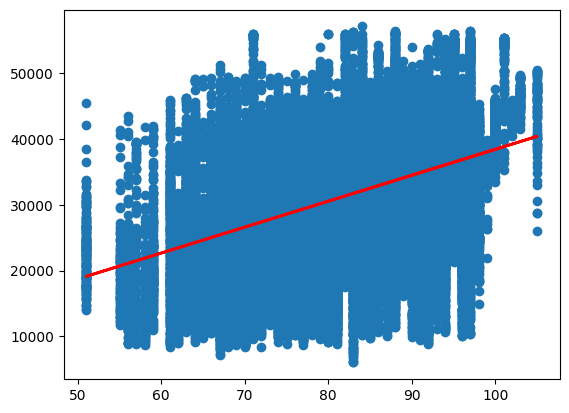

In [5]:
# EDA of variables in finalized glogs
plt.scatter(glogs_final['prev_year_wins'],glogs_final['attendance'])

slope, intercept = np.polyfit(glogs_final['prev_year_wins'], glogs_final['attendance'], 1)
plt.plot(glogs_final['prev_year_wins'], slope * glogs_final['prev_year_wins'] + intercept, color='red', linewidth=2)
slope

In [6]:
glogs_final.groupby('day_night')['attendance'].mean()

day_night
0    32670.689346
1    30100.644318
Name: attendance, dtype: float64

In [7]:
glogs_final.groupby('made_playoffs')['attendance'].mean()

made_playoffs
0    28564.084004
1    36739.377394
Name: attendance, dtype: float64

In [8]:
glogs_final.groupby('won_division')['attendance'].mean()

won_division
0    29162.165884
1    37984.852062
Name: attendance, dtype: float64

<Axes: xlabel='h_name'>

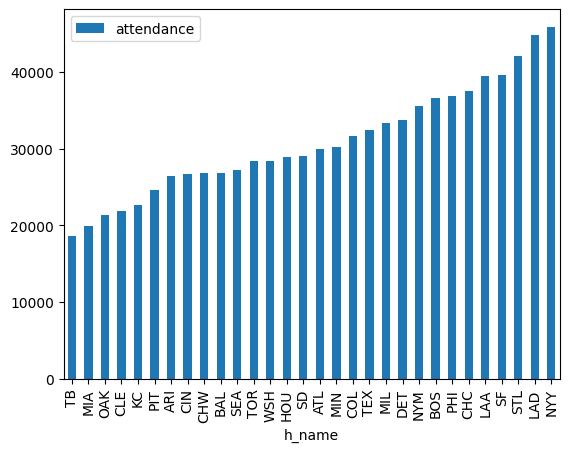

In [9]:
homedf = glogs_final.groupby('h_name')['attendance'].mean().sort_values().to_frame()
homedf.plot(kind='bar', y='attendance')

<Axes: xlabel='park_id'>

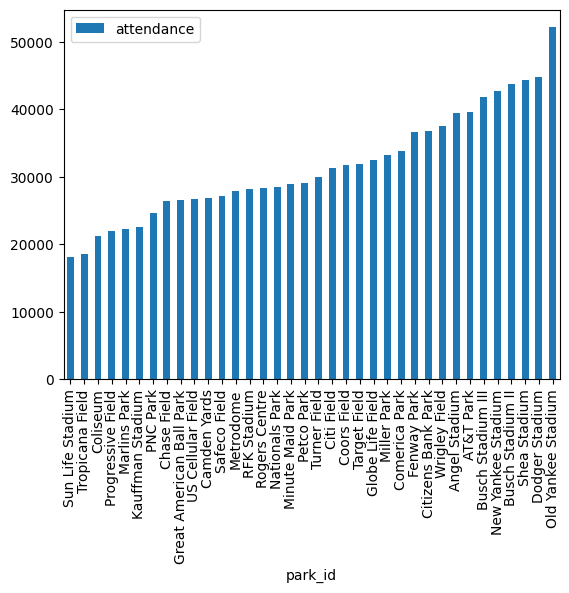

In [31]:
capacity = glogs_final.groupby('park_id')['attendance'].mean().sort_values().to_frame().reset_index()
capacity.plot(kind='bar', x='park_id', y='attendance')

<Axes: xlabel='week'>

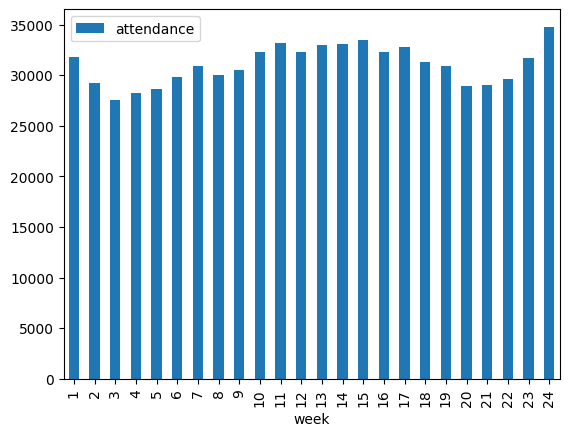

In [32]:
week = glogs_final.groupby('week')['attendance'].mean().to_frame().reset_index()
week.plot(kind='bar', x='week', y='attendance')

<Axes: xlabel='day_of_week'>

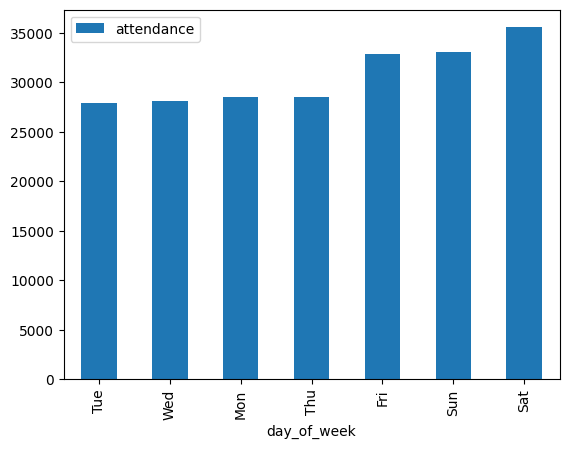

In [17]:
day = glogs_final.groupby('day_of_week')['attendance'].mean().sort_values().to_frame().reset_index()
day.plot(kind='bar', x='day_of_week', y='attendance')

<Axes: xlabel='prev_year_wins', ylabel='attendance'>

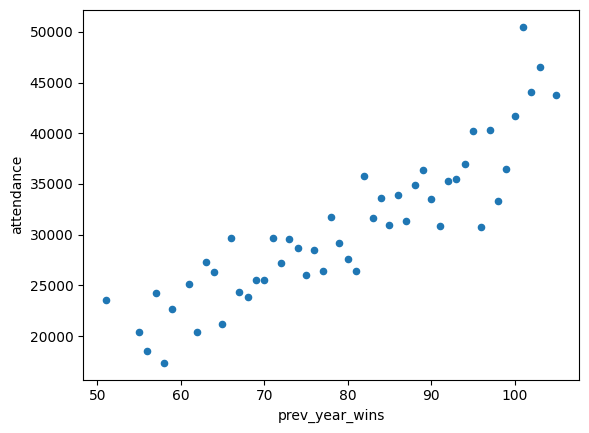

In [18]:
winsdf = glogs_final.groupby('prev_year_wins')['attendance'].mean().to_frame().reset_index()
winsdf.plot(kind='scatter', x='prev_year_wins', y='attendance')

<Axes: xlabel='InstagramFollowers', ylabel='attendance'>

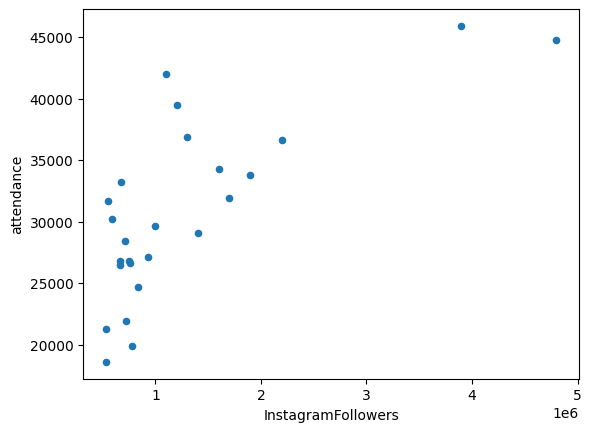

In [20]:
social = glogs_final.groupby('InstagramFollowers')['attendance'].mean().to_frame().reset_index()
social.plot(kind='scatter', x='InstagramFollowers', y='attendance')

<Axes: xlabel='CityPopulation', ylabel='attendance'>

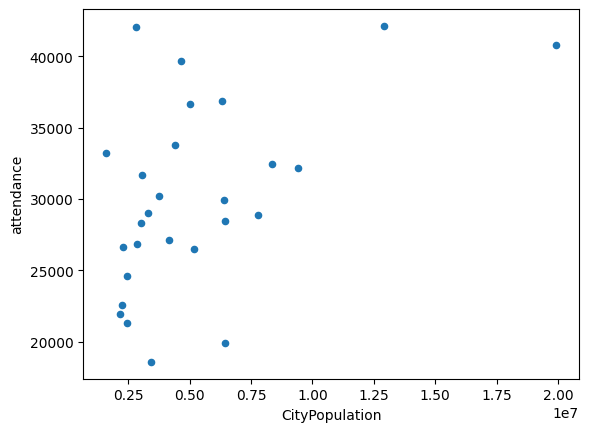

In [21]:
population = glogs_final.groupby('CityPopulation')['attendance'].mean().to_frame().reset_index()
population.plot(kind='scatter', x='CityPopulation', y='attendance')

<Axes: xlabel='capacity', ylabel='attendance'>

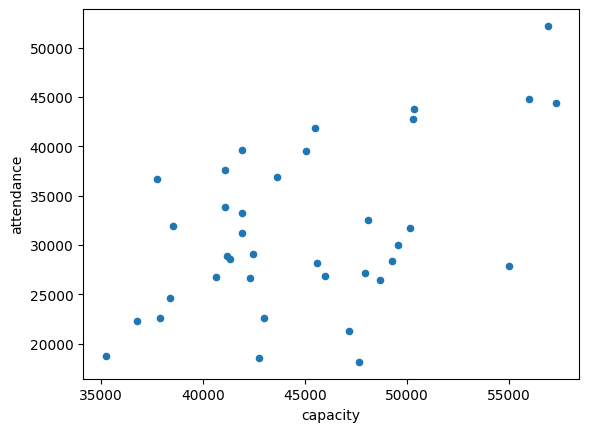

In [22]:
capacity = glogs_final.groupby('capacity')['attendance'].mean().to_frame().reset_index()
capacity.plot(kind='scatter', x='capacity', y='attendance')

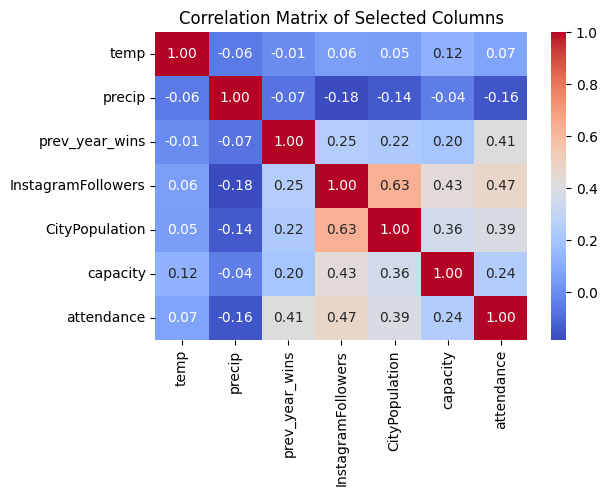

In [17]:
# Correlation matrix

corr_mat = glogs_final[['temp', 'precip', 'prev_year_wins', 'InstagramFollowers', 'CityPopulation', 'capacity', 'attendance']].corr()
corr_mat

plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Columns")
plt.show()